<a href="https://colab.research.google.com/github/TaseenNiloy34/Covid-19-Classifier-VGG19/blob/main/Damage_LungCOVID_19VGG19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing, Cloning & Importing

In [ ]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 394.3MB 39kB/s 


**Update dataset: !git pull**

In [ ]:
# Update dataset: !git pull
!git clone https://github.com/casperbh96/COVID-19-Detection.git dataset

fatal: destination path 'dataset' already exists and is not an empty directory.


**Import essential library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2, time
import tensorflow as tf

tf.__version__

'2.2.0'

# Loading The Datasets

In [ ]:
covid_path = 'dataset/covid_dataset.csv'
covid_image_path = 'dataset/covid_adjusted/'

normal_path = 'dataset/normal_xray_dataset.csv'
normal_image_path = 'dataset/normal_dataset/'

covid_df = pd.read_csv(covid_path, usecols=['filename', 'finding'])
normal_df = pd.read_csv(normal_path, usecols=['filename', 'finding'])

normal_df = normal_df.head(99)

covid_df.head()

,filename,finding
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
4,nejmc2001573_f1a.jpeg.jpg,COVID-19


In [ ]:
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255

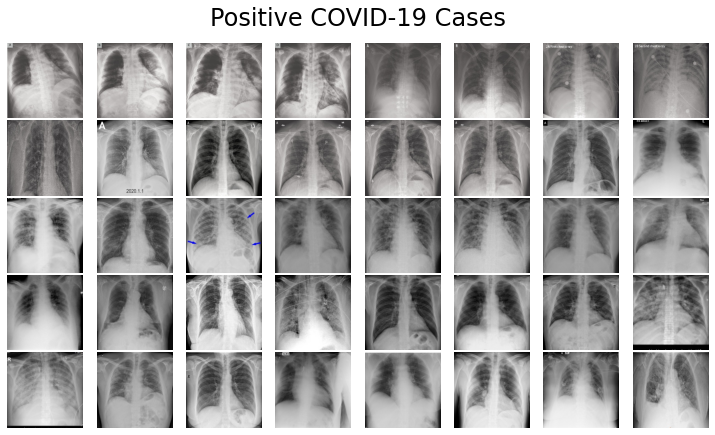

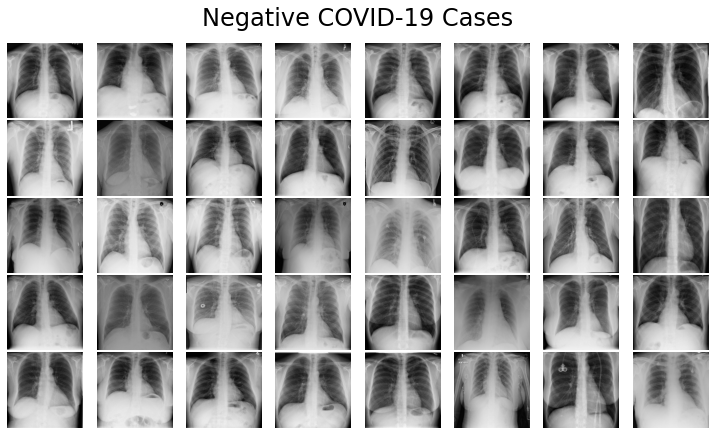

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(covid_images, 'Positive COVID-19 Cases')
plot_images(normal_images, 'Negative COVID-19 Cases')

# Splitting Datasets Into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(
    normal_images, normal_labels, test_size=0.2)

X_train = np.concatenate((normal_x_train, covid_x_train), axis=0)
X_test = np.concatenate((normal_x_test, covid_x_test), axis=0)
y_train = np.concatenate((normal_y_train, covid_y_train), axis=0)
y_test = np.concatenate((normal_y_test, covid_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

# Demonstration of Augmentation

## Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

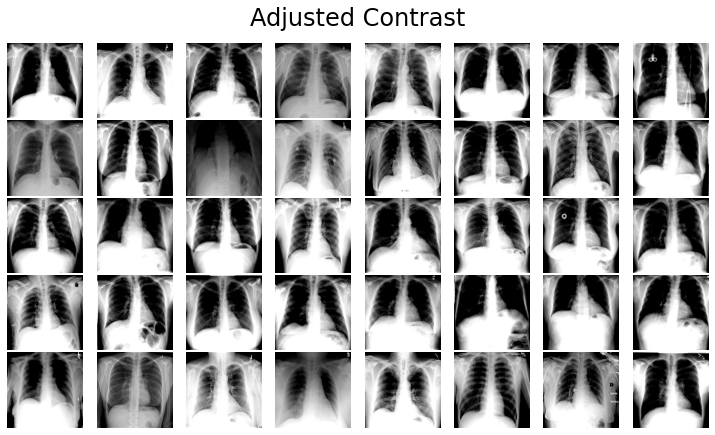

In [ ]:
X_train_contrast = []

for x in X_train:
    contrast = tf.image.adjust_contrast( x, 2 ) #It takes two parameter: Images and constrast_factor. 
    #Images:Images to adjust. At least 3-D.
    #Constrast_factor:A float multiplier for adjusting contrast.
    X_train_contrast.append(contrast.numpy())

plot_images(X_train_contrast, 'Adjusted Contrast')

## Saturation

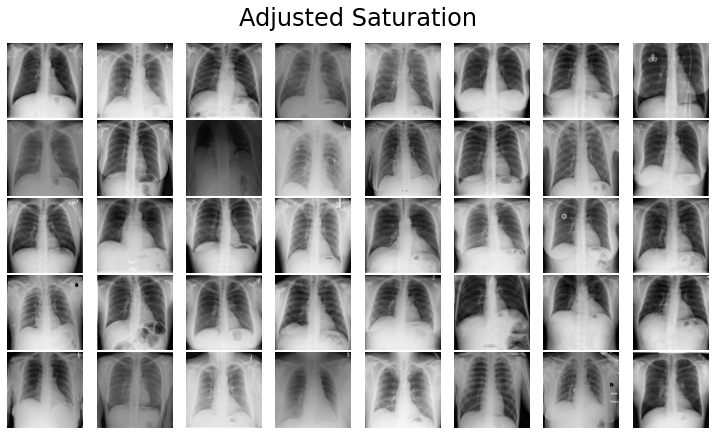

In [ ]:
X_train_saturation = []

for x in X_train:
    saturation = tf.image.adjust_saturation( x, 3 )
    X_train_saturation.append(saturation.numpy())

plot_images(X_train_saturation, 'Adjusted Saturation')

## Flip Left Right

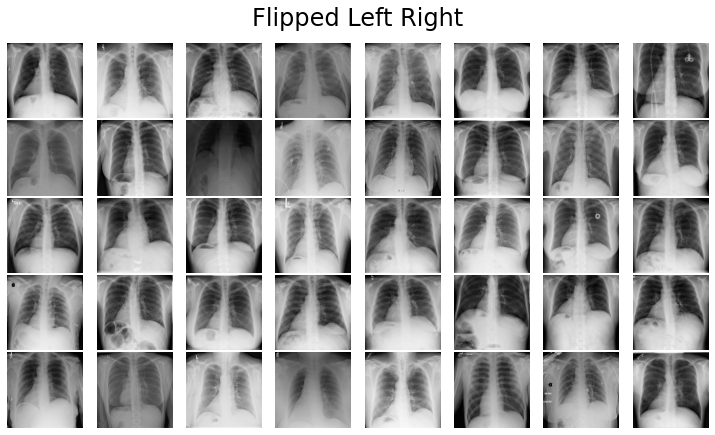

In [ ]:
X_train_flipped = []

for x in X_train:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped.append(flipped.numpy())

plot_images(X_train_flipped, 'Flipped Left Right')

## Flip Up Down

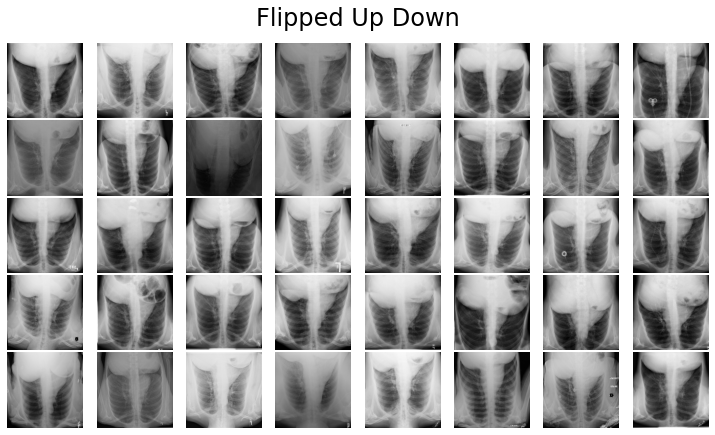

In [ ]:
X_train_flipped_up_down = []

for x in X_train:
    flipped = tf.image.flip_up_down(x)
    X_train_flipped_up_down.append(flipped.numpy())

plot_images(X_train_flipped_up_down, 'Flipped Up Down')

## Flip Up Down Left Right

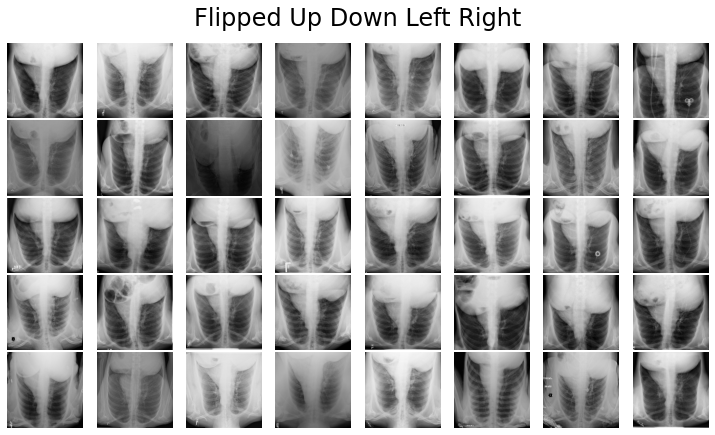

In [ ]:
X_train_flipped_up_down_left_right = []

for x in X_train_flipped_up_down:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped_up_down_left_right.append(flipped.numpy())

plot_images(X_train_flipped_up_down_left_right, 'Flipped Up Down Left Right')

In [ ]:
pip install tensorflow-addons==0.11.1 

     |████████████████████████████████| 1.1MB 4.2MB/s 


In [ ]:
pip install tensorflow-gpu==2.2

     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 3.0MB 45kB/s 
     |████████████████████████████████| 460kB 39.6MB/s 
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow-gpu 2.4.1
    Uninstalling tensorflow-gpu-2.4.1:
      Successfully uninstalled tensorflow-gpu-2.4.1


## Rotations

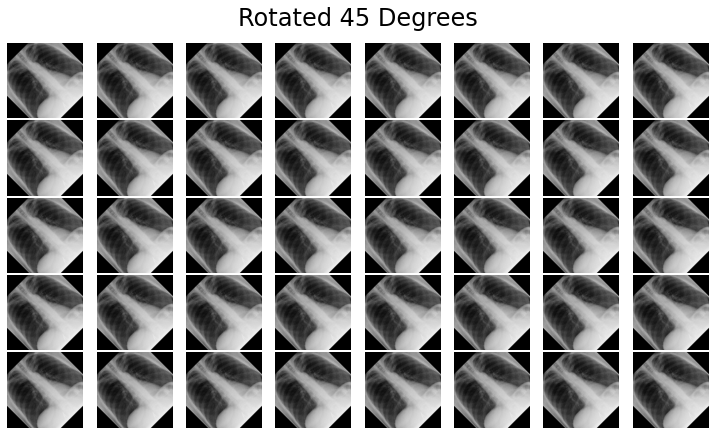

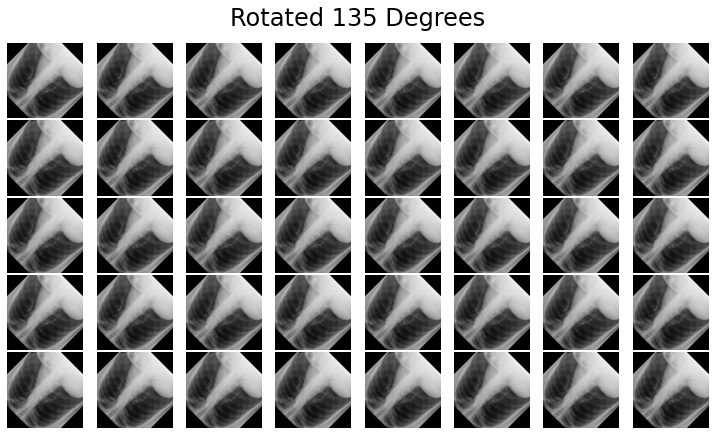

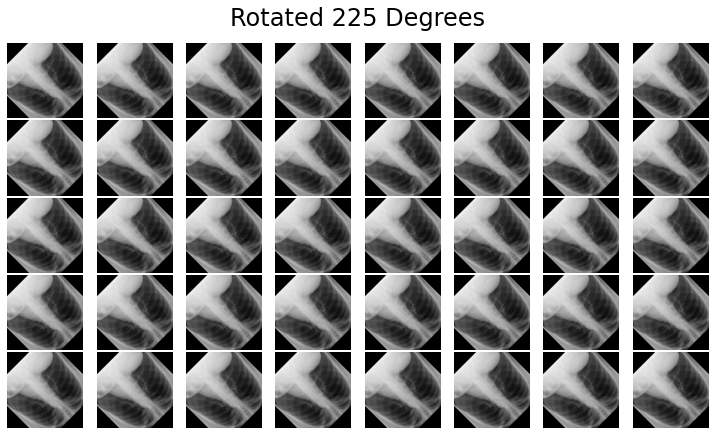

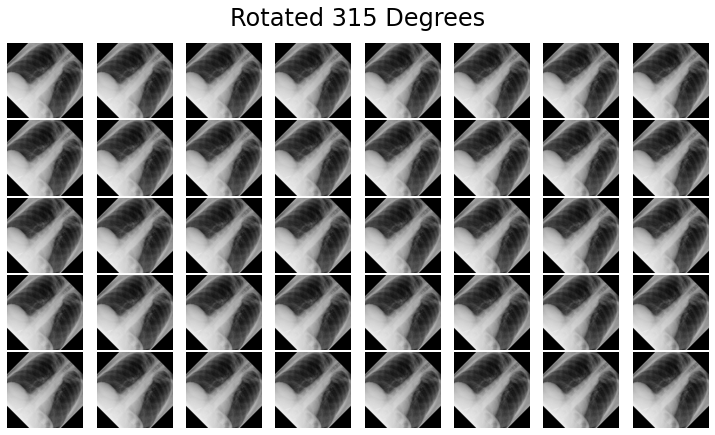

In [ ]:
import tensorflow_addons as tfa
from math import radians
X_train_rot_45_deg = []
X_train_rot_135_deg = []
X_train_rot_225_deg = []
X_train_rot_315_deg = []

for x in X_train:
    deg_45 = tfa.image.transform_ops.rotate(image, radians(45))
    deg_135 = tfa.image.transform_ops.rotate(image, radians(135))
    deg_225 = tfa.image.transform_ops.rotate(image, radians(225))
    deg_315 = tfa.image.transform_ops.rotate(image, radians(315))

    X_train_rot_45_deg.append(deg_45)
    X_train_rot_135_deg.append(deg_135)
    X_train_rot_225_deg.append(deg_225)
    X_train_rot_315_deg.append(deg_315)

plot_images(X_train_rot_45_deg, 'Rotated 45 Degrees')
plot_images(X_train_rot_135_deg, 'Rotated 135 Degrees')
plot_images(X_train_rot_225_deg, 'Rotated 225 Degrees')
plot_images(X_train_rot_315_deg, 'Rotated 315 Degrees')

# Modeling With Keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

vggModel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = vggModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=5)

Epoch 1/5
5/4 [===============================] - 3s 509ms/step - loss: 1.8957 - accuracy: 0.5658 - val_loss: 2.0100 - val_accuracy: 0.5128
Epoch 2/5
5/4 [===============================] - 2s 305ms/step - loss: 1.4718 - accuracy: 0.4605 - val_loss: 0.5511 - val_accuracy: 0.8718
Epoch 3/5
5/4 [===============================] - 2s 306ms/step - loss: 1.3241 - accuracy: 0.5263 - val_loss: 1.1131 - val_accuracy: 0.5128
Epoch 4/5
5/4 [===============================] - 2s 312ms/step - loss: 1.1998 - accuracy: 0.5132 - val_loss: 0.4852 - val_accuracy: 0.7692
Epoch 5/5
5/4 [===============================] - 2s 318ms/step - loss: 0.8631 - accuracy: 0.5789 - val_loss: 0.7691 - val_accuracy: 0.6667


In [ ]:
y_pred = model.predict(X_test, batch_size=32)
y_pred_covid = model.predict(covid_x_test, batch_size=32) 

In [ ]:
y_test_covid = LabelBinarizer().fit_transform(covid_y_test)
y_test_covid = to_categorical(y_test_covid)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.61      0.95      0.75        20

    accuracy                           0.67        39
   macro avg       0.74      0.66      0.63        39
weighted avg       0.74      0.67      0.63        39



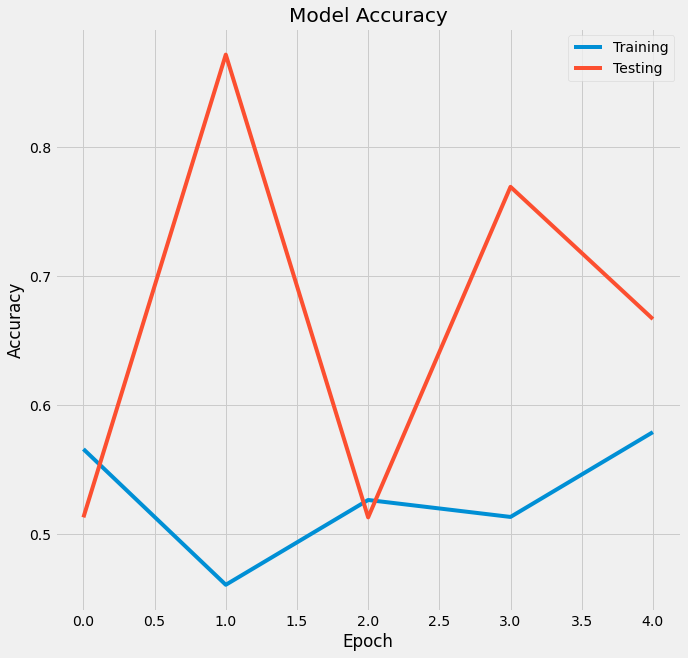

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])

plt.show()

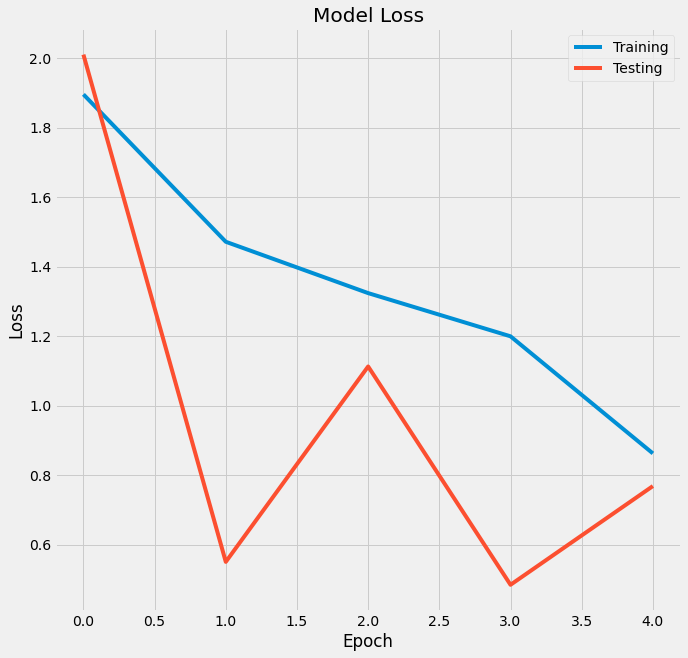

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])

plt.show()